In [1]:
import os
import string
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = "darkgrid")

In [2]:
reviews_path = "F:/datasets/PRACTICE FOLDER/deep-learning-v2-pytorch-master - UDACITY/sentiment-rnn/data/reviews.txt"
with open(reviews_path, "r") as f:
    reviews = f.read()

labels_path = "F:/datasets/PRACTICE FOLDER/deep-learning-v2-pytorch-master - UDACITY/sentiment-rnn/data/labels.txt"
with open(labels_path, "r") as f:
    labels = f.read()

In [3]:
#let's look at the data
print(reviews[:2000])
print(100 * "-")
print(labels[:100])

bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   
story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comedy . a formal orchestra audience is turn

In [4]:
#we need to clean the data for all the punctuations and non numeric characters
def Clean_Text(data):
    clean_data = [w.lower() for w in data]
    clean_data = [w for w in clean_data if w not in string.punctuation]
    clean_data = "".join([w for w in clean_data])
    
    return clean_data

In [5]:
#call the above function
clean_reviews = Clean_Text(reviews)

In [6]:
print(f"LENGTH OF THE DATA BEFORE CLEANING : {len(reviews)}")
print(f"LENGTH OF THE DATA AFTER CLAEANING : {len(clean_reviews)}")

LENGTH OF THE DATA BEFORE CLEANING : 33678267
LENGTH OF THE DATA AFTER CLAEANING : 33351075


In [7]:
split_reviews = clean_reviews.split("\n")
all_text = " ".join(split_reviews)

In [8]:
split_reviews[0]

'bromwell high is a cartoon comedy  it ran at the same time as some other programs about school life  such as  teachers   my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers   the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students  when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled          at           high  a classic line inspector i  m here to sack one of your teachers  student welcome to bromwell high  i expect that many adults of my age think that bromwell high is far fetched  what a pity that it isn  t   '

In [9]:
len(split_reviews)

25001

In [10]:
#create the list of words
words = all_text.split()

In [11]:
print(words[:100])

['bromwell', 'high', 'is', 'a', 'cartoon', 'comedy', 'it', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life', 'such', 'as', 'teachers', 'my', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'bromwell', 'high', 's', 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', 'teachers', 'the', 'scramble', 'to', 'survive', 'financially', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', 'teachers', 'pomp', 'the', 'pettiness', 'of', 'the', 'whole', 'situation', 'all', 'remind', 'me', 'of', 'the', 'schools', 'i', 'knew', 'and', 'their', 'students', 'when', 'i', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school', 'i', 'immediately', 'recalled', 'at', 'high']


In [12]:
#we need to obtain some sort of mapping, so that we can map our words with their corresponding integer values
from collections import Counter

#building a dictionery that maps words to integer values
counts = Counter(words)
sort_counts = sorted(counts, reverse = True, key = counts.get)

word2index = {word : idx for idx, word in enumerate(sort_counts, 1)} #word to index mapping

In [13]:
reviews_int = []
for review in split_reviews:
    reviews_int.append([word2index[word] for word in review.split()])

In [14]:
#total number of unique words in the vocabulary
print(f"TOTAL NUMBER OF UNIQUE WORDS IN THE VOCABULARY : {len(sort_counts)}")

print(100 * "-")

#also check at the integer reviews
print(reviews_int[0:1])

TOTAL NUMBER OF UNIQUE WORDS IN THE VOCABULARY : 74072
----------------------------------------------------------------------------------------------------
[[21025, 308, 6, 3, 1050, 207, 8, 2138, 32, 1, 171, 57, 15, 49, 81, 5785, 44, 382, 110, 140, 15, 5194, 60, 154, 9, 1, 4975, 5852, 475, 71, 5, 260, 12, 21025, 308, 13, 1978, 6, 74, 2395, 5, 613, 73, 6, 5194, 1, 24103, 5, 1983, 10166, 1, 5786, 1499, 36, 51, 66, 204, 145, 67, 1199, 5194, 19869, 1, 37442, 4, 1, 221, 883, 31, 2988, 71, 4, 1, 5787, 10, 686, 2, 67, 1499, 54, 10, 216, 1, 383, 9, 62, 3, 1406, 3686, 783, 5, 3483, 180, 1, 382, 10, 1212, 13583, 32, 308, 3, 349, 341, 2913, 10, 143, 127, 5, 7690, 30, 4, 129, 5194, 1406, 2326, 5, 21025, 308, 10, 528, 12, 109, 1448, 4, 60, 543, 102, 12, 21025, 308, 6, 227, 4146, 48, 3, 2211, 12, 8, 215, 23]]


#### ENCODING THE LABELS

In [15]:
#encoding the labels into 0 and 1
split_labels = labels.split("\n")

#positive -- 1 and negative -- 0
encoded_labels = np.array([1 if label == "positive" else 0 for label in split_labels])

In [16]:
encoded_labels

array([1, 0, 1, ..., 1, 0, 0])

#### DEALING WITH OUTLIERS

In [17]:
#here we will look for the shortest and the longest reviews in our dataset
#if the length of the shortest review is 0 we will get rid of that
review_len = Counter([len(x) for x in reviews_int])

print(f"NUMBER OF REVIEWS WITH ZERO-LENGTH : {review_len[0]}")
print(f"MAXIMUM REVIEW LENGTH IS : {max(review_len)}")

NUMBER OF REVIEWS WITH ZERO-LENGTH : 1
MAXIMUM REVIEW LENGTH IS : 2514


Okay, a couple issues here. We seem to have one review with zero length. And, the maximum review length is way too many steps for our RNN. We'll have to remove any super short reviews and truncate super long reviews. This removes outliers and should allow our model to train more efficiently.

In [18]:
#we will get rid of any short and super long reviews
print(f"NUMBER OF REVIEWS BEFORE TRUNCATING : {len(reviews_int)}")

#get all the integer values corresponding to non_zero_reviews
non_zero_reviews_int = [i for i, review in enumerate(reviews_int) if len(review) != 0]

#once we have the integer values for all non_Zero_reviews we can get only those reviews with non_zero_reviews
non_zero_reviews = [reviews_int[i] for i in non_zero_reviews_int] #all the non zero length reviews
non_zero_labels = [encoded_labels[i] for i in non_zero_reviews_int] #all the corresponding non zero labels

print(f"LENGTH OF THE REVIEWS AFTER TRUNCATING : {len(non_zero_reviews)}")

NUMBER OF REVIEWS BEFORE TRUNCATING : 25001
LENGTH OF THE REVIEWS AFTER TRUNCATING : 25000


#### PADDING THE SEQUENCES

In [19]:
#we want all our reviews to have same sequence length
#we will be padding all the reviews to a particular length
#any shorter review will be padded with zeros and any longer review will be truncated to sequence length
def Padding(reviews_int, seq_len):
    features = np.zeros((len(reviews_int), seq_len), dtype = int)
    
    for i, row in enumerate(reviews_int):
        features[i, -len(row):] = np.array(row)[:seq_len]
    
    return features

In [20]:
seq_len = 200

padded_seq = Padding(non_zero_reviews, seq_len)

# print first 10 values of the first 30 batches 
print(padded_seq[:30,:10])

[[    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [22382    42 46418    15   706 17139  3389    47    77    35]
 [ 4505   505    15     3  3342   162  8312  1652     6  4819]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [   54    10    14   116    60   798   552    71   364     5]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    1   330   578    34     3   162   748  2731     9   325]
 [    9    11 10171  5305  1946   689   444    22   280   673]
 [    0     0     0     0     0     0     0     0     0

In [21]:
#split the data into train test split
from sklearn.model_selection import train_test_split

In [22]:
#first convert the labels from list to array
non_zero_labels = np.array(non_zero_labels)

In [23]:
x_train, x_test_new, y_train, y_test_new = train_test_split(padded_seq, non_zero_labels, test_size = 0.33, random_state = 101)

In [24]:
#let's look at the shape of our training and test set
print(f"THE SHAPE OF THE X TRAIN IS : {x_train.shape}")
print(f"THE SHAPE OF THE X TEST IS : {x_test_new.shape}")
print(f"THE SHAPE OF THE Y TRIAN IS : {y_train.shape}")
print(f"THE SHAPE OF THE Y TEST IS : {y_test_new.shape}")

THE SHAPE OF THE X TRAIN IS : (16750, 200)
THE SHAPE OF THE X TEST IS : (8250, 200)
THE SHAPE OF THE Y TRIAN IS : (16750,)
THE SHAPE OF THE Y TEST IS : (8250,)


In [25]:
#we can further split the testing data into validation data
x_test, x_val, y_test, y_val = train_test_split(x_test_new, y_test_new, test_size = 0.2, random_state = 101)

In [26]:
#let's look at the shape of our training and test set and validation set
print(f"THE SHAPE OF THE X TRAIN IS : {x_train.shape}")
print(f"THE SHAPE OF THE X TEST IS : {x_test.shape}")
print(f"THE SHAPE OF THE Y TRIAN IS : {y_train.shape}")
print(f"THE SHAPE OF THE Y TEST IS : {y_test.shape}")
print(f"THE SHAPE OF THE X VAL IS : {x_val.shape}")
print(f"THE SHAPE OF THE Y VAL IS : {y_val.shape}")

THE SHAPE OF THE X TRAIN IS : (16750, 200)
THE SHAPE OF THE X TEST IS : (6600, 200)
THE SHAPE OF THE Y TRIAN IS : (16750,)
THE SHAPE OF THE Y TEST IS : (6600,)
THE SHAPE OF THE X VAL IS : (1650, 200)
THE SHAPE OF THE Y VAL IS : (1650,)


#### DATA LOADERS AND BATCHING

In [27]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [28]:
#create tensor data
train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_val), torch.from_numpy(y_val))
test_data = TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test))

#create the DataLoader
batch_size = 50
train_loader = DataLoader(train_data, batch_size = batch_size, shuffle = True)
valid_loader = DataLoader(valid_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_data, batch_size = batch_size, shuffle = True)

In [29]:
features, labels = next(iter(train_loader))
print(features.shape)
print(labels.shape)

torch.Size([50, 200])
torch.Size([50])


#### BUILDING THE MODEL

In [30]:
#import the required libraires
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [31]:
#check for the availability of GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [32]:
class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, input_size, output_size, embedding_dim, hidden_size, n_layers, drop_prob = 0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentLSTM, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_size = hidden_size
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(input_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_size, n_layers, dropout = drop_prob, batch_first = True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_size, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_size)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
    
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_size).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_size).zero_().cuda())
        
        return hidden

In [33]:
len(word2index) + 1

74073

In [34]:
#assign the values to our parameters
INPUT_SIZE = len(word2index) + 1
OUTPUT_SIZE = 1
EMBEDDING_DIM = 400
HIDDEN_SIZE = 256
N_LAYERS = 2

model = SentimentLSTM(input_size = INPUT_SIZE, output_size = OUTPUT_SIZE, embedding_dim = EMBEDDING_DIM, 
                      hidden_size = HIDDEN_SIZE, n_layers = N_LAYERS)

model = model.to(device)
print(model)

SentimentLSTM(
  (embedding): Embedding(74073, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [35]:
#define the loss and the optimizer function
criterion = nn.BCELoss()

optimizer = optim.Adam(model.parameters(), lr = 0.0002)

#### TRAINING THE MODEL

In [36]:
# training params

epochs = 15 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip = 5 # gradient clipping

model.train()

train_loss = []
valid_loss = []
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = model.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1
        
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        optimizer.zero_grad()

        # get the output from the model
        output, h = model(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        train_loss.append(loss.item())

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = model.init_hidden(batch_size)
            val_losses = []
            model.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                inputs, labels = inputs.to(device), labels.to(device)

                output, val_h = model(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())
                
            valid_loss.append(val_losses)

            model.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/15... Step: 100... Loss: 0.671319... Val Loss: 0.682135
Epoch: 1/15... Step: 200... Loss: 0.476009... Val Loss: 0.613869
Epoch: 1/15... Step: 300... Loss: 0.694350... Val Loss: 0.554676
Epoch: 2/15... Step: 400... Loss: 0.439570... Val Loss: 0.561869
Epoch: 2/15... Step: 500... Loss: 0.473942... Val Loss: 0.517173
Epoch: 2/15... Step: 600... Loss: 0.513771... Val Loss: 0.527133
Epoch: 3/15... Step: 700... Loss: 0.468231... Val Loss: 0.539065
Epoch: 3/15... Step: 800... Loss: 0.509234... Val Loss: 0.488659
Epoch: 3/15... Step: 900... Loss: 0.337607... Val Loss: 0.477118
Epoch: 3/15... Step: 1000... Loss: 0.276071... Val Loss: 0.466151
Epoch: 4/15... Step: 1100... Loss: 0.362273... Val Loss: 0.526711
Epoch: 4/15... Step: 1200... Loss: 0.286683... Val Loss: 0.512956
Epoch: 4/15... Step: 1300... Loss: 0.207526... Val Loss: 0.476192
Epoch: 5/15... Step: 1400... Loss: 0.306675... Val Loss: 0.502707
Epoch: 5/15... Step: 1500... Loss: 0.330618... Val Loss: 0.460069
Epoch: 5/15... Step

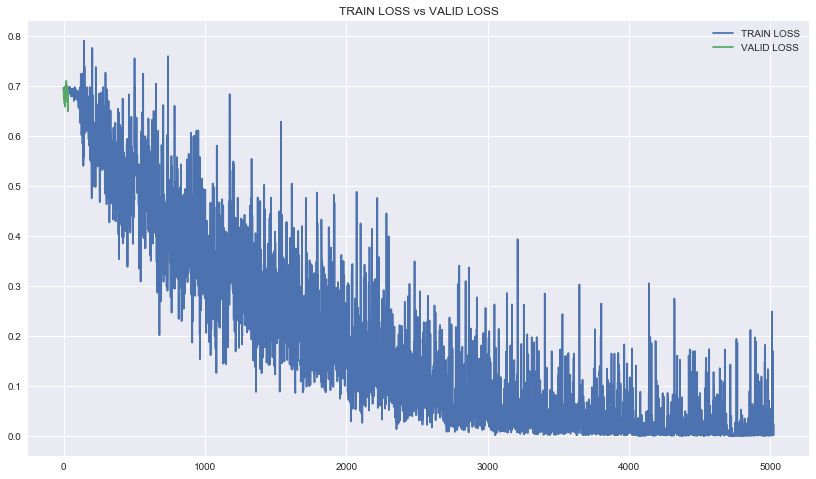

In [37]:
plt.figure(figsize = (14,8))
plt.plot(train_loss, label = "TRAIN LOSS")
plt.plot(valid_loss[0], label = "VALID LOSS")
plt.title("TRAIN LOSS vs VALID LOSS")
plt.legend(loc = "best")

#### TESTING THE MODEL

In [38]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = model.init_hidden(batch_size)

model.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # get predicted outputs
    output, h = model(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.945
Test accuracy: 0.819


#### MAKING INFERENCE

In [39]:
# negative test review
test_review_neg = 'The worst movie I have seen; acting was terrible and I want my money back. This movie had bad acting and the dialogue was slow.'

In [40]:
from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # tokens
    test_ints = []
    test_ints.append([word2index[word] for word in test_words])

    return test_ints

# test code and generate tokenized review
test_ints = tokenize_review(test_review_neg)
print(test_ints)

[[1, 247, 18, 10, 28, 108, 113, 14, 388, 2, 10, 181, 60, 273, 144, 11, 18, 68, 76, 113, 2, 1, 410, 14, 539]]


In [41]:
# test sequence padding
seq_length = 200
features = Padding(test_ints, seq_length)

print(features)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   1 247  18  10  28
  108 113  14 388   2  10 181  60 273 144  11  18  68  76 113   2   1 410
   14 539]]


In [42]:
def predict(model, test_review, sequence_length = 200):
    
    model.eval()
    
    # tokenize review
    test_ints = tokenize_review(test_review)
    
    # pad tokenized sequence
    seq_length = sequence_length
    features = Padding(test_ints, seq_length)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = model.init_hidden(batch_size)
    
    #put the tensor on the GPU
    feature_tensor = feature_tensor.to(device)
    
    # get the output from the model
    output, h = model(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if(pred.item() == 1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")

In [43]:
# call function
seq_length = 200
predict(model, test_review_neg, seq_length)

Prediction value, pre-rounding: 0.000047
Negative review detected.


In [50]:
# positive test review
test_review_pos = 'This movie had the best acting and the dialogue was so good. I loved it. Incredible movie, must watch!!'

In [51]:
predict(model, test_review_pos, seq_length)

Prediction value, pre-rounding: 0.998501
Positive review detected!


In [48]:
#test another review
new_review = "This movie is so real. Direction is superb. Vicky is brilliant in his performance. Script is tightly bound. Music just complements the action, makes it even better."

In [49]:
predict(model, new_review, seq_length)

Prediction value, pre-rounding: 0.999968
Positive review detected!


In [52]:
torch.save(model.state_dict(), "sentiment_analysis.pth")

#### CONVERTING PYTORCH MODEL TO ONNX

In [53]:
from torch.autograd import Variable
import torch.onnx

In [62]:
saved_model = SentimentLSTM(INPUT_SIZE, OUTPUT_SIZE, EMBEDDING_DIM, HIDDEN_SIZE, N_LAYERS)

trained_model = saved_model

#load the saved model
trained_model.load_state_dict(torch.load("sentiment_analysis.pth"))

# Export the trained model to ONNX
dummy_input = Variable(torch.randn(1, 1, 28, 28)) # one black and white 28 x 28 picture will be the input to the model
torch.onnx.export(trained_model, dummy_input, "sentiment.onnx", export_params = True)

TypeError: forward() missing 1 required positional argument: 'hidden'